<a href="https://colab.research.google.com/github/raguram/eva/blob/master/S9/CIFAR10_Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount the drive and load required modules

In [1]:
from os.path import join
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT, force_remount=True)

LIBRARY_ROOT = "/content/drive/My Drive/Colab Notebooks/workspace/cnn-lib/"

from importlib.machinery import SourceFileLoader

SourceFileLoader('Utility', join(LIBRARY_ROOT, 'Utility.py')).load_module()
SourceFileLoader('DataUtility', join(LIBRARY_ROOT, 'DataUtility.py')).load_module()
SourceFileLoader('CIFAR10Net', join(LIBRARY_ROOT, 'CIFAR10Net.py')).load_module()
SourceFileLoader('MetricsUtility', join(LIBRARY_ROOT, 'MetricsUtility.py')).load_module()
SourceFileLoader('ModelBuilder', join(LIBRARY_ROOT, 'ModelBuilder.py')).load_module()
SourceFileLoader('LossFunctionUtility', join(LIBRARY_ROOT, 'LossFunctionUtility.py')).load_module()
SourceFileLoader('Resnet', join(LIBRARY_ROOT, 'Resnet.py')).load_module()

print("Loaded the required modules")

Mounted at /content/drive
Loaded the required modules


In [2]:
!pip install albumentations==0.4.5


In [0]:
from torchvision import datasets, transforms
from ModelBuilder import ModelTester
import torch
import Utility 
import DataUtility
import MetricsUtility
import ModelBuilder
from LossFunctionUtility import LossFn
import torch.nn.functional as F
import torch.optim as optim
from ModelBuilder import ModelBuilder
import Resnet
import torch.nn as nn
from albumentations import *
from albumentations.pytorch import ToTensor
import numpy as np
from DataUtility import Alb
import cv2

### Load the data and perform required transformations

Files already downloaded and verified
Files already downloaded and verified
Shape of a train data batch: torch.Size([128, 3, 32, 32])
Shape of a test data batch: torch.Size([128, 3, 32, 32])
Number of train images: 50000
Number of test images: 10000


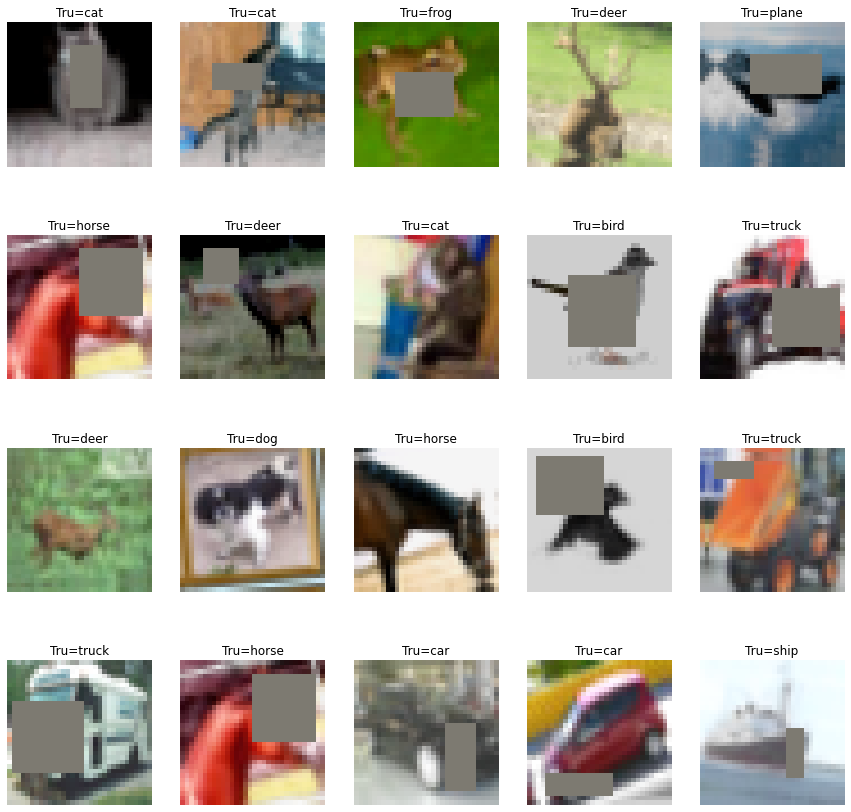

In [6]:
mean = (0.4914, 0.4822, 0.4465)
std = (0.2023, 0.1994, 0.2010)

mean_array = np.array([*mean])


train_transforms = Compose([
          HorizontalFlip(p=0.5),
          RandomContrast(limit=0.2, p=0.5),
          RandomBrightness(limit=0.2, p=0.5),
          HueSaturationValue(hue_shift_limit=5, sat_shift_limit=20,
                       val_shift_limit=10, p=.9),
          ShiftScaleRotate(
              shift_limit=0.0625, scale_limit=0.1, 
              rotate_limit=15, border_mode=cv2.BORDER_REFLECT_101, p=0.8),
          CoarseDropout(max_holes=1, max_height=16, max_width=16, min_height=4,
						min_width=4, fill_value=np.array([*mean])*255.0, p=0.5),
          Normalize(mean, std),
          ToTensor()
        ])
  
test_transforms = Compose([
          Normalize(mean, std),
          ToTensor()
          ])

data=DataUtility.download_CIFAR10(Alb(train_transforms), Alb(test_transforms))
DataUtility.showLoaderImages(data.train, count=20, classes=data.classes, muSigmaPair=(mean, std))

## Initialize the network and view the summary

In [7]:
from torchsummary import summary
summary(Resnet.ResNet18().to(Utility.getDevice()), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

## Train the network

In [12]:
net = Resnet.ResNet18().to(Utility.getDevice())
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum=0.9)
builder = ModelBuilder(net, data, LossFn(nn.CrossEntropyLoss()), optimizer)
result = builder.fit(40)



Epoch: 1



Train Accuracy: 45.972%, Train Loss: 0.011624651029706001



Test Accuracy: 61.56%, Test Loss: 0.008570528589189053


Epoch: 2



Train Accuracy: 63.7%, Train Loss: 0.008040795102715492



Test Accuracy: 69.4%, Test Loss: 0.007035396993160248


Epoch: 3



Train Accuracy: 70.914%, Train Loss: 0.006478395313024521



Test Accuracy: 75.24%, Test Loss: 0.005891768727451563


Epoch: 4



Train Accuracy: 75.002%, Train Loss: 0.005611676722764969



Test Accuracy: 75.47%, Test Loss: 0.005724102258682251


Epoch: 5



Train Accuracy: 77.432%, Train Loss: 0.0050642238929867744



Test Accuracy: 79.08%, Test Loss: 0.004999165888875723


Epoch: 6



Train Accuracy: 79.246%, Train Loss: 0.004647592082619667



Test Accuracy: 81.76%, Test Loss: 0.004175946582108736


Epoch: 7



Train Accuracy: 80.826%, Train Loss: 0.004276396241039038



Test Accuracy: 81.85%, Test Loss: 0.0043903980404138565


Epoch: 8



Train Accuracy: 82.418%, Train Loss: 0.003991072066128254



Test Accuracy: 83.57%, Test Loss: 0.003840627148747444


Epoch: 9



Train Accuracy: 83.674%, Train Loss: 0.003699348308146



Test Accuracy: 83.66%, Test Loss: 0.0038603786379098892


Epoch: 10



Train Accuracy: 84.49%, Train Loss: 0.003505609929561615



Test Accuracy: 84.06%, Test Loss: 0.0038692743983119726


Epoch: 11



Train Accuracy: 85.292%, Train Loss: 0.0033083513844758272



Test Accuracy: 86.43%, Test Loss: 0.0032662684097886086


Epoch: 12



Train Accuracy: 85.86%, Train Loss: 0.0031601381488144398



Test Accuracy: 83.11%, Test Loss: 0.004126929212361574


Epoch: 13



Train Accuracy: 86.558%, Train Loss: 0.003008302766829729



Test Accuracy: 87.02%, Test Loss: 0.0031221250537782907


Epoch: 14



Train Accuracy: 87.37%, Train Loss: 0.002832361962646246



Test Accuracy: 86.52%, Test Loss: 0.003166017821058631


Epoch: 15



Train Accuracy: 87.832%, Train Loss: 0.0027037584222853184



Test Accuracy: 87.27%, Test Loss: 0.00302199088037014


Epoch: 16



Train Accuracy: 88.288%, Train Loss: 0.002607769099995494



Test Accuracy: 88.22%, Test Loss: 0.002854197286069393


Epoch: 17



Train Accuracy: 88.742%, Train Loss: 0.002495810389518738



Test Accuracy: 87.66%, Test Loss: 0.002960854908451438


Epoch: 18



Train Accuracy: 89.086%, Train Loss: 0.0024369992315769196



Test Accuracy: 88.77%, Test Loss: 0.002686244435608387


Epoch: 19



Train Accuracy: 89.708%, Train Loss: 0.0022916006855666637



Test Accuracy: 89.54%, Test Loss: 0.0025691722985357046


Epoch: 20



Train Accuracy: 89.732%, Train Loss: 0.0022860527969896793



Test Accuracy: 89.48%, Test Loss: 0.002601590007543564


Epoch: 21



Train Accuracy: 90.482%, Train Loss: 0.0020964648574590683



Test Accuracy: 89.14%, Test Loss: 0.002740638330578804


Epoch: 22



Train Accuracy: 90.622%, Train Loss: 0.0020885274279862642



Test Accuracy: 89.89%, Test Loss: 0.0025197945069521666


Epoch: 23



Train Accuracy: 91.21%, Train Loss: 0.00197623367421329



Test Accuracy: 89.68%, Test Loss: 0.002549744676798582


Epoch: 24



Train Accuracy: 91.276%, Train Loss: 0.0019128484418615699



Test Accuracy: 88.68%, Test Loss: 0.0029001703951507807


Epoch: 25



Train Accuracy: 91.594%, Train Loss: 0.001846733153797686



Test Accuracy: 89.52%, Test Loss: 0.002652894239872694


Epoch: 26



Train Accuracy: 91.748%, Train Loss: 0.0018420364940539002



Test Accuracy: 89.66%, Test Loss: 0.0026184257585555315


Epoch: 27



Train Accuracy: 92.092%, Train Loss: 0.0017426494741812348



Test Accuracy: 90.29%, Test Loss: 0.002494057873263955


Epoch: 28



Train Accuracy: 92.136%, Train Loss: 0.0017166484612971544



Test Accuracy: 89.3%, Test Loss: 0.0026958072558045387


Epoch: 29



Train Accuracy: 92.496%, Train Loss: 0.0016737255500629544



Test Accuracy: 90.12%, Test Loss: 0.0025707706809043884


Epoch: 30



Train Accuracy: 92.986%, Train Loss: 0.0015670848079025745



Test Accuracy: 89.95%, Test Loss: 0.0026426033582538366


Epoch: 31



Train Accuracy: 92.928%, Train Loss: 0.0015668575651943684



Test Accuracy: 90.61%, Test Loss: 0.0024166398216038942


Epoch: 32



Train Accuracy: 93.186%, Train Loss: 0.00150467234198004



Test Accuracy: 90.71%, Test Loss: 0.002427435712888837


Epoch: 33



Train Accuracy: 93.5%, Train Loss: 0.001423955662176013



Test Accuracy: 90.71%, Test Loss: 0.0025153399910777807


Epoch: 34



Train Accuracy: 93.8%, Train Loss: 0.001384159317240119



Test Accuracy: 90.77%, Test Loss: 0.002489472506567836


Epoch: 35



Train Accuracy: 93.812%, Train Loss: 0.0013685876037925482



Test Accuracy: 90.27%, Test Loss: 0.002619315404444933


Epoch: 36



Train Accuracy: 94.094%, Train Loss: 0.0013080562930554152



Test Accuracy: 90.87%, Test Loss: 0.002356764627620578


Epoch: 37



Train Accuracy: 94.018%, Train Loss: 0.0013254302321001887



Test Accuracy: 91.12%, Test Loss: 0.002361704595386982


Epoch: 38



Train Accuracy: 94.288%, Train Loss: 0.0012522037141025066



Test Accuracy: 91.51%, Test Loss: 0.002312825061380863


Epoch: 39



Train Accuracy: 94.404%, Train Loss: 0.0012413751101121306



Test Accuracy: 91.12%, Test Loss: 0.002509153913706541


Epoch: 40



Train Accuracy: 94.534%, Train Loss: 0.0012136170407757163



Test Accuracy: 91.13%, Test Loss: 0.002411783207207918


## Plot metrics and loss

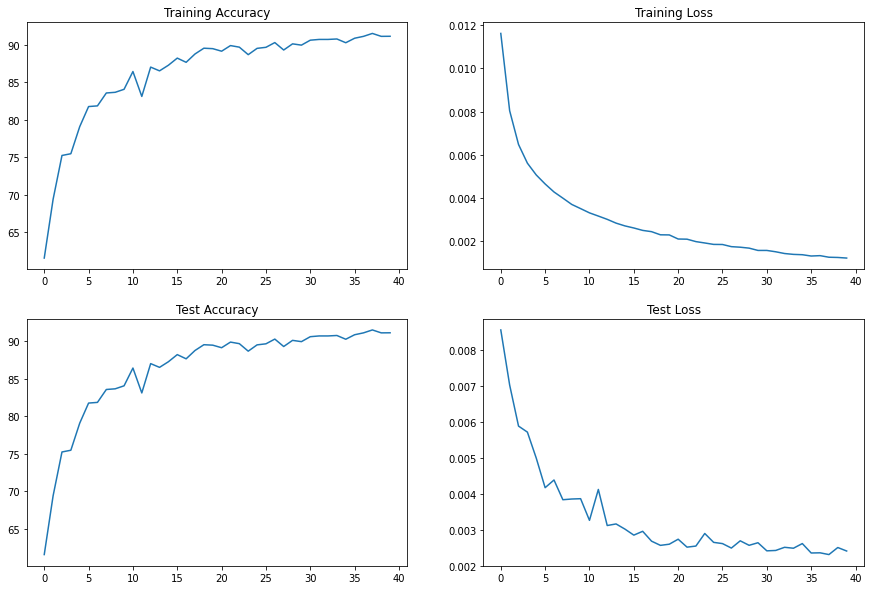

In [13]:
MetricsUtility.plotMetrics(result)

## View miss classified images


[[894   4  13  13   7   3   6   2  34  24]
 [  2 946   1   5   0   0   2   0   7  37]
 [ 26   0 851  25  41  16  33   5   3   0]
 [  2   0  25 802  37  65  53   7   7   2]
 [  2   1   5  10 947   4  18  13   0   0]
 [  3   1  11  85  27 843  18  10   1   1]
 [  2   0   7  16   7   2 966   0   0   0]
 [  3   1  11  18  22  12   2 929   2   0]
 [  6   1   4   7   1   0   2   1 963  15]
 [  4  20   2   3   1   2   3   0   5 960]]


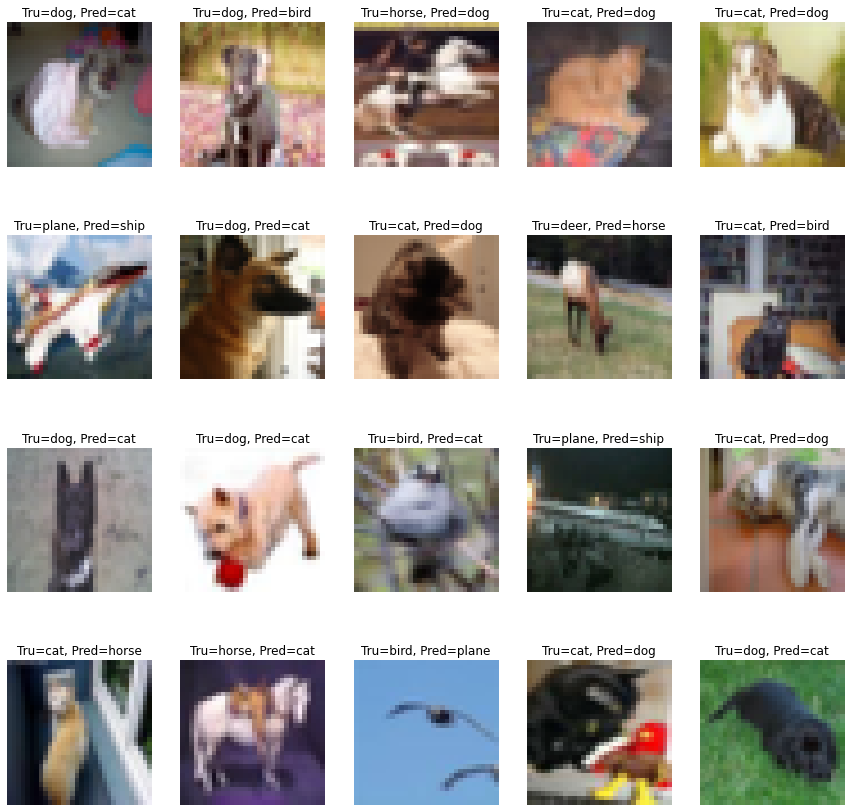

In [15]:
cpu = torch.device("cpu")
testResult = ModelTester().test(net, data.test, LossFn(F.nll_loss))
metrics = MetricsUtility.computeMetrics(testResult.data, testResult.predictions, testResult.targets)
DataUtility.showRandomImages(metrics.miss_classified_data.to(cpu), metrics.miss_classified_targets.to(cpu), metrics.miss_classified_predictions.to(cpu), data.classes, muSigmaPair=(mean, std))